<a href="https://colab.research.google.com/github/rocio-perez-sbarato/SocioHackaton/blob/main/graficos_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Índice

- [Cruce de características y escuelas](https://colab.research.google.com/drive/1f2HcZM4aG3zP-_meptEzNDiH2i0zeBos#scrollTo=roapM9EENEr-)

- [Electricidad](https://colab.research.google.com/drive/1f2HcZM4aG3zP-_meptEzNDiH2i0zeBos#scrollTo=qrMKSuLsNL7S)

- [Internet](https://colab.research.google.com/drive/1f2HcZM4aG3zP-_meptEzNDiH2i0zeBos#scrollTo=8rQbRn5lNN07)

- [Biblioteca](https://colab.research.google.com/drive/1f2HcZM4aG3zP-_meptEzNDiH2i0zeBos#scrollTo=8CB0H80HNQE1)


# Librerías

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Instalar y cargar la librería writexl
install.packages("writexl")

library(writexl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Cruce de características y escuelas

In [3]:
# Cargar la base de datos
características <- read.csv("Caracteristicas.csv", sep = ";", fileEncoding = "ISO-8859-1")
escuelas_con_extranjeros <- read.csv("escuelas_con_extranjeros_2015.csv", sep = ",", fileEncoding = "ISO-8859-1")
escuelas_sin_extranjeros <- read.csv("escuelas_sin_extranjeros_2015.csv", sep = ",", fileEncoding = "ISO-8859-1")

# Renombrar la columna ID1 a id
características <- características %>%
  rename(id = ID1)

# Solo por si hace falta
características$provincia <- gsub("Ã³", "ó", características$provincia)
características$provincia <- gsub("Ã­", "í", características$provincia)
características$provincia <- gsub("Ã©", "é", características$provincia)
características$provincia <- gsub("Ãº", "ú", características$provincia)
características$provincia <- gsub("Ã±", "ñ", características$provincia)
características$provincia <- gsub("Ã¡", "á", características$provincia)

# Verificar nombres de columnas
print(colnames(características))
print(colnames(escuelas_con_extranjeros))
print(colnames(escuelas_sin_extranjeros))

# Filtrar de escuelas con extranjeros
características_con_extranjeros <- características %>%
  semi_join(escuelas_con_extranjeros, by = "id")

# Filtrar de escuelas sin extranjeros
características_sin_extranjeros <- características %>%
  semi_join(escuelas_sin_extranjeros, by = "id")

# Verificar la cantidad de filas después del filtrado
cat("Filas en características_con_extranjeros:", nrow(características_con_extranjeros), "\n")
cat("Filas en características_sin_extranjeros:", nrow(características_sin_extranjeros), "\n")

# Guardar la tabla en un .csv
write.csv(características_con_extranjeros, "características_con_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")
write.csv(características_sin_extranjeros, "características_sin_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")

# Mostrar el resultado
head(características_con_extranjeros, 10)
head(características_sin_extranjeros, 10)


 [1] "id"                                                           
 [2] "provincia"                                                    
 [3] "sector"                                                       
 [4] "ambito"                                                       
 [5] "Electricidad...Si"                                            
 [6] "Electricidad...Red.pública"                                   
 [7] "Electricidad...Grupo.electrógeno"                             
 [8] "Electricidad...Panel.fotovoltaico.solar"                      
 [9] "Electricidad...Generador.eólico"                              
[10] "Electricidad...Generador.hidráulico"                          
[11] "Electricidad...Otro"                                          
[12] "Equipamiento.Establecimiento...Televisor"                     
[13] "Equipamiento.Establecimiento...Sistema.multimedia.o.Cañón"    
[14] "Equipamiento.Establecimiento...Scanner"                       
[15] "Equipamiento.Establecimiento

,id,provincia,sector,ambito,Electricidad...Si,Electricidad...Red.pública,Electricidad...Grupo.electrógeno,Electricidad...Panel.fotovoltaico.solar,Electricidad...Generador.eólico,Electricidad...Generador.hidráulico,⋯,Sistema.de.Gestión.Escolar...Planilla.de.Calculo,Dispone.de.sala.o.laboratorio.de.informática...Si,Laboratorio...Funciona.es.espacio.exclusivo....Si,Biblioteca...Dispone.de.al.menos.una....Si,Biblioteca...Funciona.es.espacio.exclusivo....Si,Subvención.Estatal...Jardín.Maternal...Si,Subvención.Estatal...Jardín.de.Infantes...Si,Subvención.Estatal...Primaria...Si,Subvención.Estatal...Secundaria...Si,Subvención.Estatal...SNU...Si
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3.600400e+13,Tucumán,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,
2,1.000552e+14,Ciudad de Buenos Aires,Privado,Urbano,X,X,,,,,⋯,,X,NA,X,,,X,X,,
3,1.001515e+14,Ciudad de Buenos Aires,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,
4,1.001700e+14,Ciudad de Buenos Aires,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,
5,1.001700e+14,Entre Ríos,Privado,Urbano,X,X,,,,,⋯,,,NA,X,,,X,X,,
6,1.001700e+14,Jujuy,Estatal,Rural,X,X,,,,,⋯,,X,NA,X,X,,,,,
7,1.001700e+14,Mendoza,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,,,,,,
8,1.001700e+14,Mendoza,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,
9,1.001700e+14,Buenos Aires,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,


,id,provincia,sector,ambito,Electricidad...Si,Electricidad...Red.pública,Electricidad...Grupo.electrógeno,Electricidad...Panel.fotovoltaico.solar,Electricidad...Generador.eólico,Electricidad...Generador.hidráulico,⋯,Sistema.de.Gestión.Escolar...Planilla.de.Calculo,Dispone.de.sala.o.laboratorio.de.informática...Si,Laboratorio...Funciona.es.espacio.exclusivo....Si,Biblioteca...Dispone.de.al.menos.una....Si,Biblioteca...Funciona.es.espacio.exclusivo....Si,Subvención.Estatal...Jardín.Maternal...Si,Subvención.Estatal...Jardín.de.Infantes...Si,Subvención.Estatal...Primaria...Si,Subvención.Estatal...Secundaria...Si,Subvención.Estatal...SNU...Si
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2.0004e+13,Mendoza,Estatal,Urbano,X,X,,,,,⋯,,X,NA,X,X,,,,,
2,2.0008e+13,Mendoza,Privado,Urbano,X,X,,,,,⋯,,,NA,,,X,,,,
3,2.1604e+13,Misiones,Estatal,Urbano,X,X,,,,,⋯,,,NA,,,,,,,
4,2.6404e+13,Salta,Estatal,Rural,X,,,X,,,⋯,,,NA,X,,,,,,
5,3.2804e+13,Santa Fe,Estatal,Rural,X,X,,,,,⋯,,,NA,,,,,,,
6,3.2808e+13,Santa Fe,Estatal,Rural,X,X,,,,,⋯,,,NA,,,,,,,
7,3.2812e+13,Santa Fe,Estatal,Urbano,X,X,,,,,⋯,,,NA,,,,,,,
8,3.2816e+13,Santa Fe,Estatal,Urbano,X,X,,,,,⋯,,,NA,,,,,,,
9,3.4404e+13,Santiago del Estero,Estatal,Rural,X,X,,,,,⋯,,,NA,X,X,,,,,


# Electricidad

### Cálculos

#### Nacional

In [4]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_nacional <- características %>%  # Cambiar a tu dataframe sin extranjeros
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = nrow(características) - cantidad_escuelas_con_ambas
  )  %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )

# Mostrar los resultados
head(características_electricidad_nacional)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_nacional, "características_electricidad_nacional.csv", row.names = FALSE, fileEncoding = "UTF-8")


,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,43050,2007,1041,2185,45057,47242,91.13,4.25,4.63,95.37


In [5]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_nacional_extranjeros <- características_con_extranjeros %>%
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = nrow(características_con_extranjeros) - cantidad_escuelas_con_ambas
  )  %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )


# Mostrar los resultados
head(características_electricidad_nacional_extranjeros)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_nacional_extranjeros, "características_electricidad_nacional_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")

,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,9782,41,97,209,9823,10032,97.51,0.41,2.08,97.92


In [6]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_nacional_sin_extranjeros <- características_sin_extranjeros %>%
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = nrow(características_sin_extranjeros) - cantidad_escuelas_con_ambas
  )  %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )

# Mostrar los resultados
head(características_electricidad_nacional_sin_extranjeros)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_nacional_sin_extranjeros, "características_electricidad_nacional_sin_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")


,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,33268,1966,944,1976,35234,37210,89.41,5.28,5.31,94.69


#### Provincial

In [7]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_por_provincia_sin_extranjeros <- características_sin_extranjeros %>%
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades por provincia
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = n() - cantidad_escuelas_con_ambas
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )

# Mostrar los resultados
head(características_electricidad_por_provincia_sin_extranjeros)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_por_provincia_sin_extranjeros, "características_electricidad_por_provincia_sin_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")

provincia,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Buenos Aires,9359,257,91,957,9616,10573,88.52,2.43,9.05,90.95
Catamarca,896,40,10,10,936,946,94.71,4.23,1.06,98.94
Chaco,1453,97,10,379,1550,1929,75.32,5.03,19.65,80.35
Chubut,464,23,5,1,487,488,95.08,4.71,0.20,99.80
Ciudad de Buenos Aires,880,3,20,7,883,890,98.88,0.34,0.79,99.21
Corrientes,1429,83,21,59,1512,1571,90.96,5.28,3.76,96.24


In [8]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_por_provincia_extranjeros <- características_con_extranjeros %>%
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades por provincia
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = n() - cantidad_escuelas_con_ambas
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )

# Mostrar los resultados
head(características_electricidad_por_provincia_extranjeros)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_por_provincia_extranjeros, "características_electricidad_por_provincia_extranjeros.csv", row.names = FALSE, fileEncoding = "UTF-8")

provincia,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Buenos Aires,5284,17,46,197,5301,5498,96.11,0.31,3.58,96.42
Catamarca,18,1,0,0,19,19,94.74,5.26,0.00,100.00
Chaco,68,0,0,4,68,72,94.44,0.00,5.56,94.44
Chubut,171,0,2,0,171,171,100.00,0.00,0.00,100.00
Ciudad de Buenos Aires,892,0,12,0,892,892,100.00,0.00,0.00,100.00
Corrientes,67,0,1,0,67,67,100.00,0.00,0.00,100.00


In [9]:
# Crear un nuevo dataframe solo con las columnas de electricidad
características_electricidad_por_provincia <- características %>%
  mutate(total_electricidad = rowSums(select(., 'Electricidad...Si') == "X", na.rm = TRUE),
         total_electricidad_red_publica = rowSums(select(., 'Electricidad...Red.pública') == "X", na.rm = TRUE),
         total_electricidad_otros = rowSums(select(.,
                                                  'Electricidad...Grupo.electrógeno',
                                                  'Electricidad...Panel.fotovoltaico.solar',
                                                  'Electricidad...Generador.eólico',
                                                  'Electricidad...Generador.hidráulico',
                                                  'Electricidad...Otro') == "X",
                                             na.rm = TRUE)) %>%
  # Calcular las cantidades por provincia
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_con_electricidad_red_publica = sum(total_electricidad_red_publica > 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_otros = sum(total_electricidad_otros > 0 & total_electricidad_red_publica == 0, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_electricidad_red_publica > 0 & total_electricidad_otros > 0, na.rm = TRUE),
    cantidad_escuelas_sin_electricidad = sum(total_electricidad_red_publica == 0 & total_electricidad_otros == 0, na.rm = TRUE),
    cantidad_escuelas_con_electricidad_sin_duplicados = sum(total_electricidad > 0, na.rm = TRUE) - cantidad_escuelas_con_ambas ,
    cantidad_escuelas_sin_duplicados = n() - cantidad_escuelas_con_ambas
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_electricidad_red_publica = round((cantidad_escuelas_con_electricidad_red_publica / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad_otros = round((cantidad_escuelas_con_electricidad_otros / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_sin_electricidad = round((cantidad_escuelas_sin_electricidad / cantidad_escuelas_sin_duplicados) * 100, 2),
    porcentaje_escuelas_con_electricidad = round((cantidad_escuelas_con_electricidad_sin_duplicados / cantidad_escuelas_sin_duplicados) * 100, 2)
  )

# Mostrar los resultados
head(características_electricidad_por_provincia)

# Guardar las tablas en archivos .csv
write.csv(características_electricidad_por_provincia, "características_electricidad_por_provincia.csv", row.names = FALSE, fileEncoding = "UTF-8")


provincia,cantidad_escuelas_con_electricidad_red_publica,cantidad_escuelas_con_electricidad_otros,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_electricidad,cantidad_escuelas_con_electricidad_sin_duplicados,cantidad_escuelas_sin_duplicados,porcentaje_escuelas_con_electricidad_red_publica,porcentaje_escuelas_con_electricidad_otros,porcentaje_escuelas_sin_electricidad,porcentaje_escuelas_con_electricidad
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Buenos Aires,14643,274,137,1154,14917,16071,91.11,1.70,7.18,92.82
Catamarca,914,41,10,10,955,965,94.72,4.25,1.04,98.96
Chaco,1521,97,10,383,1618,2001,76.01,4.85,19.14,80.86
Chubut,635,23,7,1,658,659,96.36,3.49,0.15,99.85
Ciudad de Buenos Aires,1772,3,32,7,1775,1782,99.44,0.17,0.39,99.61
Corrientes,1496,83,22,59,1579,1638,91.33,5.07,3.60,96.40


## Gráficos

### Nacional

#### Total

pdf 
  2

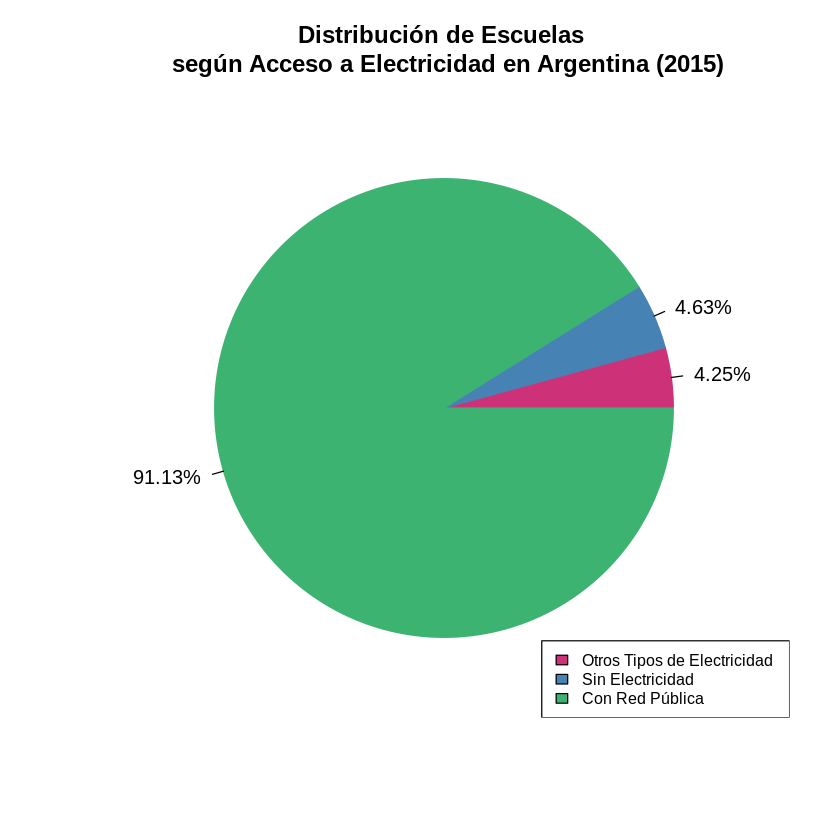

In [19]:
# Datos de escuelas
cantidad_escuelas_sin_electricidad_nacional <- características_electricidad_nacional$cantidad_escuelas_sin_electricidad
cantidad_escuelas_con_electricidad_red_publica <- características_electricidad_nacional$cantidad_escuelas_con_electricidad_red_publica
cantidad_escuelas_con_electricidad_otros <- características_electricidad_nacional$cantidad_escuelas_con_electricidad_otros
total_escuelas_nacional <- características_electricidad_nacional$cantidad_escuelas_sin_duplicados

# Cálculo de porcentajes con redondeo
porcentaje_sin_electricidad_nacional <- round((cantidad_escuelas_sin_electricidad_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_red_publica <- round((cantidad_escuelas_con_electricidad_red_publica / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_otros <- round((cantidad_escuelas_con_electricidad_otros / total_escuelas_nacional) * 100, 2)

# Crear dataframe
conteo_electricidad_nacional <- data.frame(
  electricidad_categoria = c("Otros Tipos de Electricidad", "Sin Electricidad", "Con Red Pública"),
  cantidad = c(cantidad_escuelas_con_electricidad_otros,
              cantidad_escuelas_sin_electricidad_nacional,
               cantidad_escuelas_con_electricidad_red_publica),
  porcentaje = c(porcentaje_con_electricidad_otros,
                porcentaje_sin_electricidad_nacional,
                porcentaje_con_electricidad_red_publica)
)

# Colores para el gráfico
colors <- c("#CD3278", "#4682B4", "#3CB371")

# Crear el gráfico de torta para acceso a Electricidad
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_electricidad_nacional_2015.png", width = 500, height = 500)
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)
dev.off()

#### Extranjeros

pdf 
  2

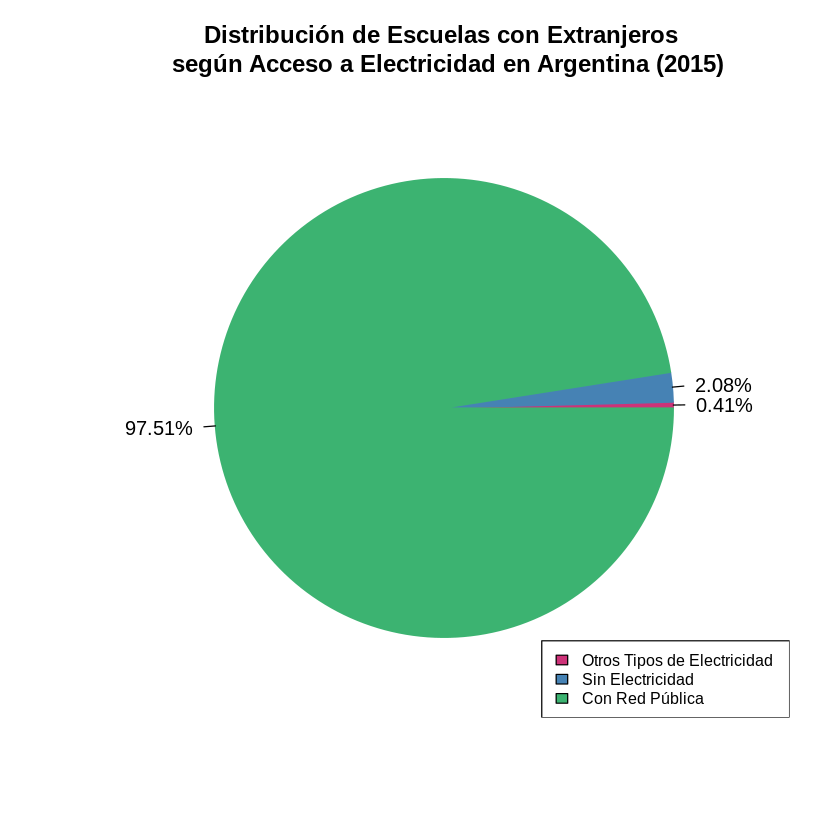

In [20]:
# Datos de escuelas
cantidad_escuelas_sin_electricidad_nacional <- características_electricidad_nacional_extranjeros$cantidad_escuelas_sin_electricidad
cantidad_escuelas_con_electricidad_red_publica <- características_electricidad_nacional_extranjeros$cantidad_escuelas_con_electricidad_red_publica
cantidad_escuelas_con_electricidad_otros <- características_electricidad_nacional_extranjeros$cantidad_escuelas_con_electricidad_otros
total_escuelas_nacional <- características_electricidad_nacional_extranjeros$cantidad_escuelas_sin_duplicados

# Cálculo de porcentajes con redondeo
porcentaje_sin_electricidad_nacional <- round((cantidad_escuelas_sin_electricidad_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_red_publica <- round((cantidad_escuelas_con_electricidad_red_publica / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_otros <- round((cantidad_escuelas_con_electricidad_otros / total_escuelas_nacional) * 100, 2)

# Crear dataframe
conteo_electricidad_nacional <- data.frame(
  electricidad_categoria = c("Otros Tipos de Electricidad", "Sin Electricidad", "Con Red Pública"),
  cantidad = c(cantidad_escuelas_con_electricidad_otros,
              cantidad_escuelas_sin_electricidad_nacional,
               cantidad_escuelas_con_electricidad_red_publica),
  porcentaje = c(porcentaje_con_electricidad_otros,
                porcentaje_sin_electricidad_nacional,
                porcentaje_con_electricidad_red_publica)
)

# Colores para el gráfico
colors <- c("#CD3278", "#4682B4", "#3CB371")  # Colores para el gráfico

# Crear el gráfico de torta para acceso a Electricidad
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_electricidad_nacional_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)
dev.off()

##### Para los años donde los porcentajes de sin electricidad y otros electricidad son muy bajos

pdf 
  2

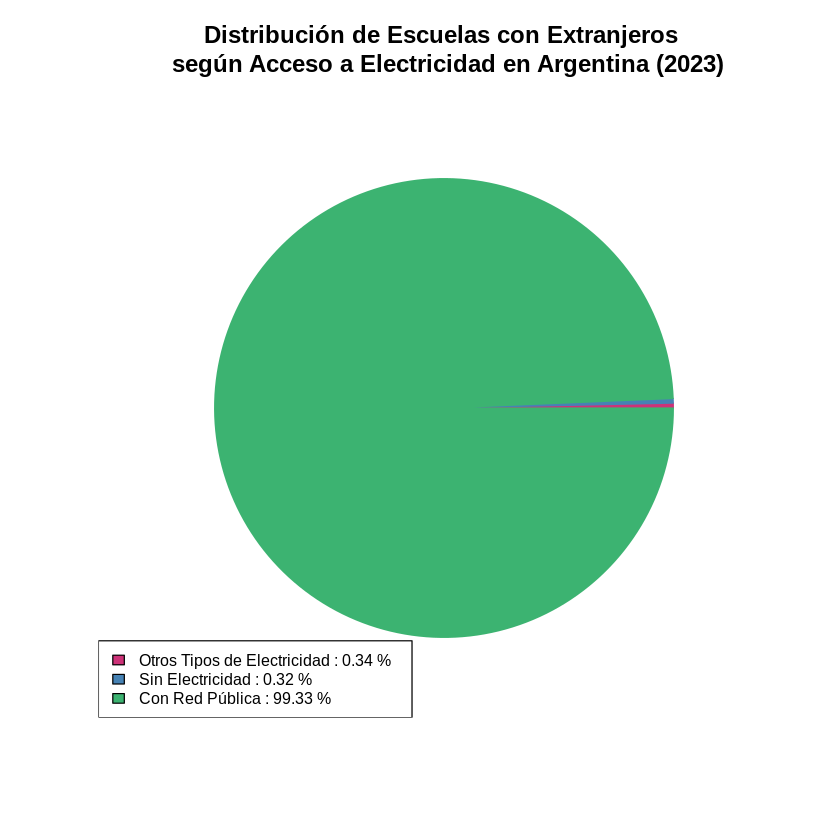

In [ ]:
# Datos de escuelas
cantidad_escuelas_sin_electricidad_nacional <- características_electricidad_nacional_extranjeros$cantidad_escuelas_sin_electricidad
cantidad_escuelas_con_electricidad_red_publica <- características_electricidad_nacional_extranjeros$cantidad_escuelas_con_electricidad_red_publica
cantidad_escuelas_con_electricidad_otros <- características_electricidad_nacional_extranjeros$cantidad_escuelas_con_electricidad_otros
total_escuelas_nacional <- características_electricidad_nacional_extranjeros$cantidad_escuelas_sin_duplicados

# Cálculo de porcentajes con redondeo
porcentaje_sin_electricidad_nacional <- round((cantidad_escuelas_sin_electricidad_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_red_publica <- round((cantidad_escuelas_con_electricidad_red_publica / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_otros <- round((cantidad_escuelas_con_electricidad_otros / total_escuelas_nacional) * 100, 2)

# Crear dataframe
conteo_electricidad_nacional <- data.frame(
  electricidad_categoria = c("Otros Tipos de Electricidad", "Sin Electricidad", "Con Red Pública"),
  cantidad = c(cantidad_escuelas_con_electricidad_otros,
              cantidad_escuelas_sin_electricidad_nacional,
               cantidad_escuelas_con_electricidad_red_publica),
  porcentaje = c(porcentaje_con_electricidad_otros,
                 porcentaje_sin_electricidad_nacional,
                 porcentaje_con_electricidad_red_publica)
)

# Colores para el gráfico
colors <- c("#CD3278", "#4682B4", "#3CB371")

# Crear el gráfico de torta sin etiquetas internas
pie(conteo_electricidad_nacional$porcentaje,
    labels = NA,  # Ocultar etiquetas en el gráfico
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Electricidad en Argentina (2023)",
    border = colors)

# Agregar la leyenda con porcentajes y categorías
legend("bottomleft",
       legend = paste(conteo_electricidad_nacional$electricidad_categoria,
                      ":",
                      round(conteo_electricidad_nacional$porcentaje, 2), "%"),
       fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_electricidad_nacional_extranjeros_2023.png", width = 500, height = 500)
pie(conteo_electricidad_nacional$porcentaje,
    labels = NA,  # Ocultar etiquetas en el gráfico
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Electricidad en Argentina (2023)",
    border = colors)
legend("bottomleft",
       legend = paste(conteo_electricidad_nacional$electricidad_categoria,
                      ":",
                      round(conteo_electricidad_nacional$porcentaje, 2), "%"),
       fill = colors, cex = 0.8)
dev.off()


#### Sin extranjeros

pdf 
  2

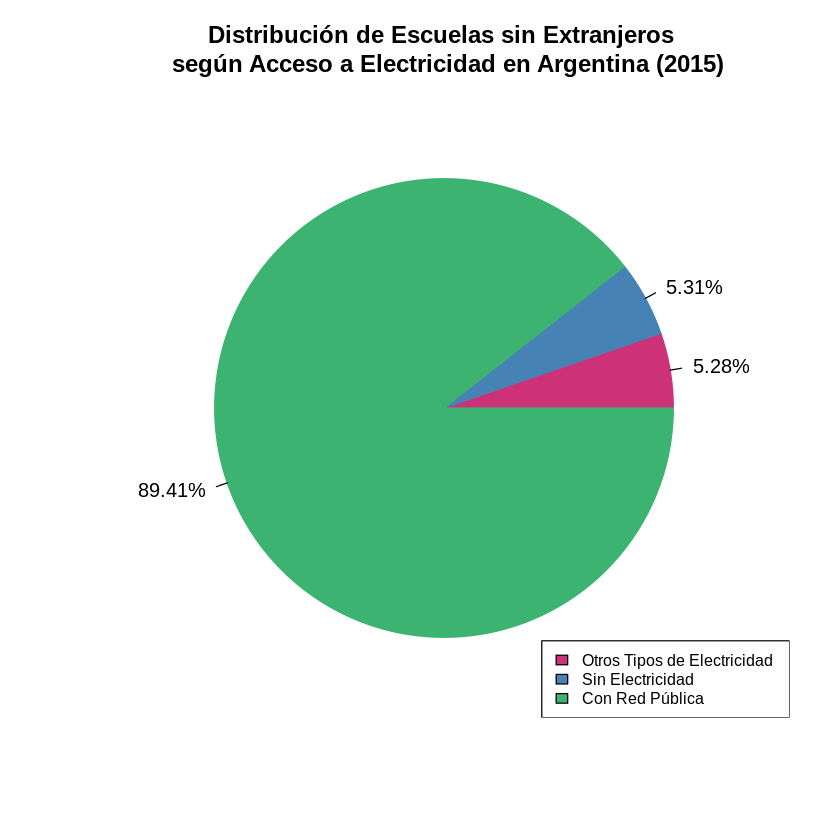

In [21]:
# Datos de escuelas
cantidad_escuelas_sin_electricidad_nacional <- características_electricidad_nacional_sin_extranjeros$cantidad_escuelas_sin_electricidad
cantidad_escuelas_con_electricidad_red_publica <- características_electricidad_nacional_sin_extranjeros$cantidad_escuelas_con_electricidad_red_publica
cantidad_escuelas_con_electricidad_otros <- características_electricidad_nacional_sin_extranjeros$cantidad_escuelas_con_electricidad_otros
total_escuelas_nacional <- características_electricidad_nacional_sin_extranjeros$cantidad_escuelas_sin_duplicados

# Cálculo de porcentajes con redondeo
porcentaje_sin_electricidad_nacional <- round((cantidad_escuelas_sin_electricidad_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_red_publica <- round((cantidad_escuelas_con_electricidad_red_publica / total_escuelas_nacional) * 100, 2)
porcentaje_con_electricidad_otros <- round((cantidad_escuelas_con_electricidad_otros / total_escuelas_nacional) * 100, 2)

# Crear dataframe
conteo_electricidad_nacional <- data.frame(
  electricidad_categoria = c("Otros Tipos de Electricidad", "Sin Electricidad", "Con Red Pública"),
  cantidad = c(cantidad_escuelas_con_electricidad_otros,
              cantidad_escuelas_sin_electricidad_nacional,
               cantidad_escuelas_con_electricidad_red_publica),
  porcentaje = c(porcentaje_con_electricidad_otros,
                porcentaje_sin_electricidad_nacional,
                porcentaje_con_electricidad_red_publica)
)

# Colores para el gráfico
colors <- c("#CD3278", "#4682B4", "#3CB371")  # Colores para el gráfico

# Crear el gráfico de torta para acceso a Electricidad
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_electricidad_nacional_sin_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_electricidad_nacional$porcentaje,
    labels = paste0(round(conteo_electricidad_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Acceso a Electricidad en Argentina (2015)",
    border = colors)
legend("bottomright", legend = conteo_electricidad_nacional$electricidad_categoria, fill = colors, cex = 0.8)
dev.off()

### Provincial

##### Total

In [22]:
características_seleccionadas <- características_electricidad_por_provincia %>%
  select(provincia,
         porcentaje_escuelas_con_electricidad_red_publica,
         porcentaje_escuelas_con_electricidad_otros,
         porcentaje_escuelas_sin_electricidad)

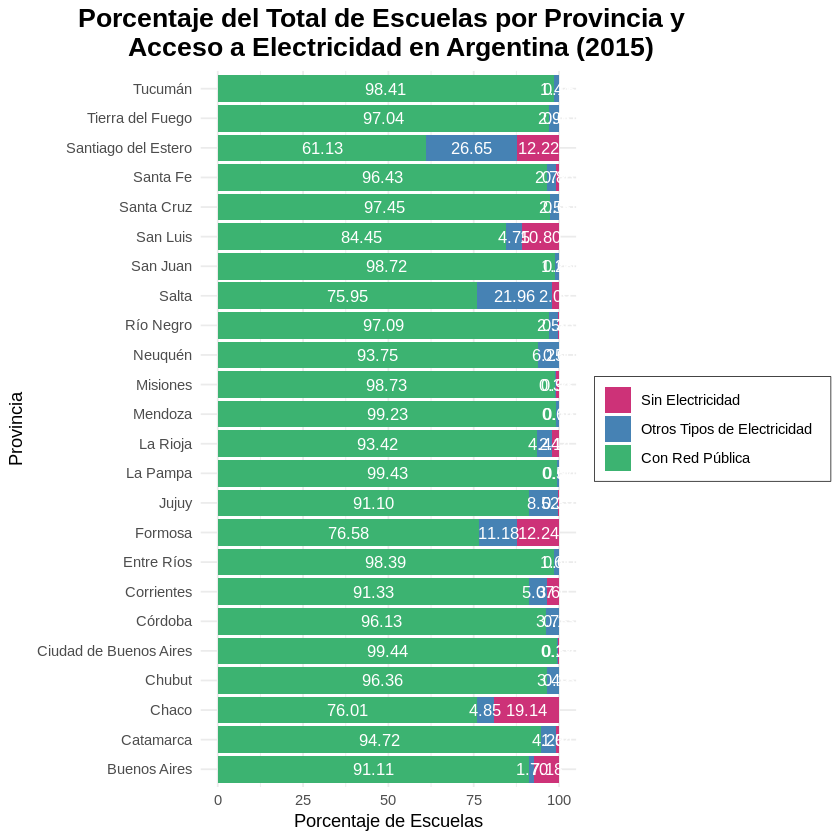

In [23]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_seleccionadas %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_electricidad",
               values_to = "porcentaje") %>%
  mutate(tipo_electricidad = factor(tipo_electricidad,
                                    levels = c("porcentaje_escuelas_sin_electricidad",
                                                "porcentaje_escuelas_con_electricidad_otros",
                                                "porcentaje_escuelas_con_electricidad_red_publica"
                                               ),
                                    labels = c("Sin Electricidad", "Otros Tipos de Electricidad", "Con Red Pública")))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_electricidad)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = sprintf("%.2f", porcentaje)),
            position = position_stack(vjust = 0.5), color = "white", size = 3.5) +  # Añadir etiquetas de porcentaje en blanco
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas por Provincia y  \n Acceso a Electricidad en Argentina (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#CD3278", "#4682B4", "#3CB371")) +  # Asegurar que "Con Red Pública" tiene el color deseado
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_tipo_electricidad_2015.png", width = 8, height = 8, dpi = 300, bg = "white")


##### Extranjeros

In [24]:
características_seleccionadas <- características_electricidad_por_provincia_extranjeros %>%
  select(provincia,
         porcentaje_escuelas_con_electricidad_red_publica,
         porcentaje_escuelas_con_electricidad_otros,
         porcentaje_escuelas_sin_electricidad)

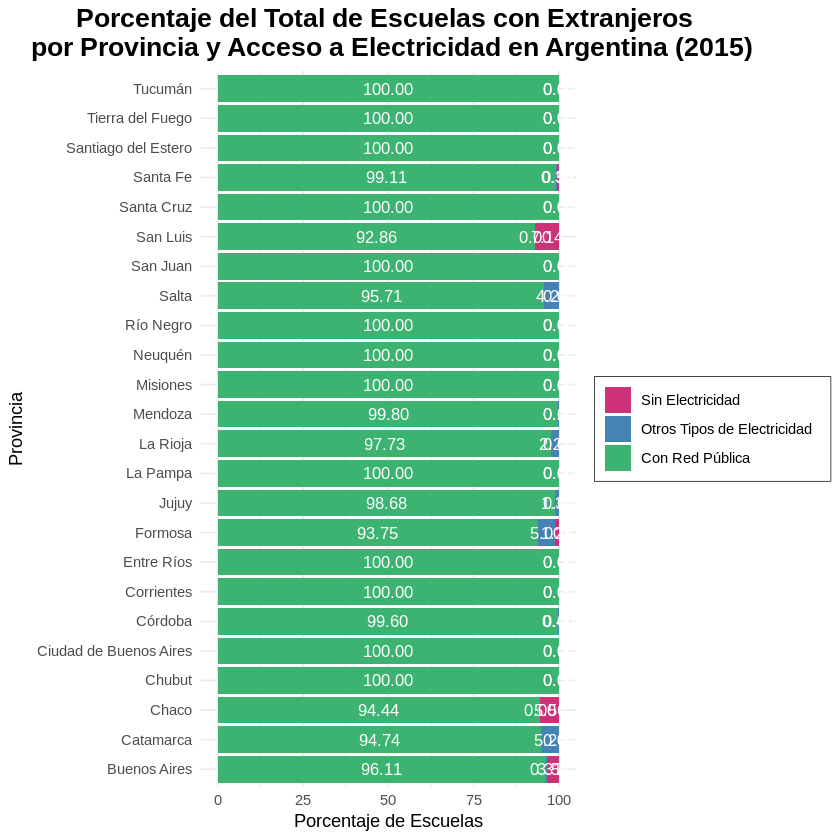

In [25]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_seleccionadas %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_electricidad",
               values_to = "porcentaje") %>%
  mutate(tipo_electricidad = factor(tipo_electricidad,
                                    levels = c("porcentaje_escuelas_sin_electricidad",
                                                "porcentaje_escuelas_con_electricidad_otros",
                                                "porcentaje_escuelas_con_electricidad_red_publica"
                                               ),
                                    labels = c("Sin Electricidad", "Otros Tipos de Electricidad", "Con Red Pública")))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_electricidad)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = sprintf("%.2f", porcentaje)),
            position = position_stack(vjust = 0.5), color = "white", size = 3.5) +  # Añadir etiquetas de porcentaje en blanco
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas con Extranjeros \n por Provincia y Acceso a Electricidad en Argentina (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#CD3278", "#4682B4", "#3CB371")) +  # Asegurar que "Con Red Pública" tiene el color deseado
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_tipo_electricidad_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")

##### Sin extranjeros

In [26]:
características_seleccionadas <- características_electricidad_por_provincia_sin_extranjeros %>%
  select(provincia,
         porcentaje_escuelas_con_electricidad_red_publica,
         porcentaje_escuelas_con_electricidad_otros,
         porcentaje_escuelas_sin_electricidad)

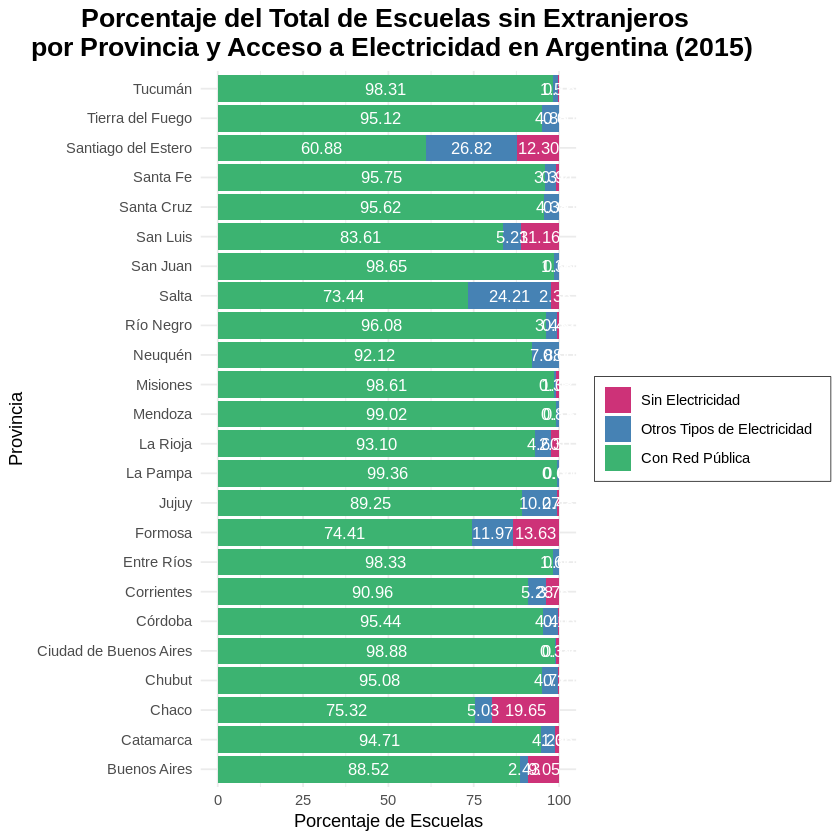

In [27]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_seleccionadas %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_electricidad",
               values_to = "porcentaje") %>%
  mutate(tipo_electricidad = factor(tipo_electricidad,
                                    levels = c("porcentaje_escuelas_sin_electricidad",
                                                "porcentaje_escuelas_con_electricidad_otros",
                                                "porcentaje_escuelas_con_electricidad_red_publica"
                                               ),
                                    labels = c("Sin Electricidad", "Otros Tipos de Electricidad", "Con Red Pública")))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_electricidad)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = sprintf("%.2f", porcentaje)),
            position = position_stack(vjust = 0.5), color = "white", size = 3.5) +  # Añadir etiquetas de porcentaje en blanco
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas sin Extranjeros \n por Provincia y Acceso a Electricidad en Argentina (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#CD3278", "#4682B4", "#3CB371")) +  # Asegurar que "Con Red Pública" tiene el color deseado
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_tipo_electricidad_sin_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")

### Excel

In [ ]:
# Guardar los resultados en un archivo Excel con varias hojas
write_xlsx(list("Total" = características_electricidad_nacional,
                "Con Extranjeros" = características_electricidad_nacional_extranjeros,
                "Sin Extranjeros" = características_electricidad_nacional_sin_extranjeros,
                "Por Provincia" = características_electricidad_por_provincia,
                "Por Provincia con Extranjeros" = características_electricidad_por_provincia_extranjeros,
                "Por Provincia sin Extranjeros" = características_electricidad_por_provincia_sin_extranjeros),
           "electricidad_2021.xlsx")

# Internet

### Cálculos

#### Nacional

In [39]:
# Definir las columnas que contienen información sobre Internet
columnas_internet_pago_gratis <- c(
  'id',
  'provincia',
  'sector',
  'ambito',
  'Internet...Tipo.de.servicio...Gratuito',
  'Internet...Tipo.de.servicio...Pago'
)

# =============================================================
# Nota: En la base de 2023, hay que incorporar las columnas
# 'Internet...Tipo.de.servicio...Gratuito.Otro' e
# 'Internet...Tipo.de.servicio...Gratuito.Estado'.
# =============================================================

# -------------------- TOTAL NACIONAL --------------------
# Crear un nuevo dataframe con las columnas de Internet a nivel nacional
características_internet_nacional <- características %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X", na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet = sum(total_internet_pago > 0 | total_internet_gratuito, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_internet_pago > 0 & total_internet_gratuito, na.rm = TRUE), # Siempre da 0, es solo para chequear
    cantidad_escuelas_total = nrow(características)
  )

# Mostrar los resultados
head(características_internet_nacional)

,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_con_internet,cantidad_escuelas_con_ambas,cantidad_escuelas_total
,<int>,<int>,<int>,<int>,<int>,<int>
1,20618,15453,12212,27665,0,48283


In [41]:
# Definir las columnas que contienen información sobre Internet
columnas_internet_pago_gratis <- c(
  'id',
  'provincia',
  'sector',
  'ambito',
  'Internet...Tipo.de.servicio...Gratuito',
  'Internet...Tipo.de.servicio...Pago'
)

# =============================================================
# Nota: En la base de 2023, hay que incorporar las columnas
# 'Internet...Tipo.de.servicio...Gratuito.Otro' e
# 'Internet...Tipo.de.servicio...Gratuito.Estado'.
# =============================================================

# -------------------- EXTRANJEROS --------------------
# Crear un nuevo dataframe con las columnas de Internet para escuelas con extranjeros
características_internet_nacional_extranjeros <- características_con_extranjeros %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X", na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet = sum(total_internet_pago > 0 | total_internet_gratuito, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_internet_pago > 0 & total_internet_gratuito, na.rm = TRUE), # Siempre da 0, es solo para chequear
    cantidad_escuelas_extranjeros = nrow(características_con_extranjeros)
  )
# Mostrar los resultados
head(características_internet_nacional_extranjeros)

,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_con_internet,cantidad_escuelas_con_ambas,cantidad_escuelas_extranjeros
,<int>,<int>,<int>,<int>,<int>,<int>
1,2784,4332,3013,7345,0,10129


In [42]:
# Definir las columnas que contienen información sobre Internet
columnas_internet_pago_gratis <- c(
  'id',
  'provincia',
  'sector',
  'ambito',
  'Internet...Tipo.de.servicio...Gratuito',
  'Internet...Tipo.de.servicio...Pago'
)

# =============================================================
# Nota: En la base de 2023, hay que incorporar las columnas
# 'Internet...Tipo.de.servicio...Gratuito.Otro' e
# 'Internet...Tipo.de.servicio...Gratuito.Estado'.
# =============================================================

# -------------------- SIN EXTRANJEROS --------------------
# Crear un nuevo dataframe con las columnas de Internet para escuelas sin extranjeros
características_internet_nacional_sin_extranjeros <- características_sin_extranjeros %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X", na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet = sum(total_internet_pago > 0 | total_internet_gratuito, na.rm = TRUE),
    cantidad_escuelas_con_ambas = sum(total_internet_pago > 0 & total_internet_gratuito, na.rm = TRUE), # Siempre da 0, es solo para chequear
    cantidad_escuelas_sin_extranjeros = nrow(características_sin_extranjeros)
  )

# Mostrar los resultados
head(características_internet_nacional_sin_extranjeros)

,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_con_internet,cantidad_escuelas_con_ambas,cantidad_escuelas_sin_extranjeros
,<int>,<int>,<int>,<int>,<int>,<int>
1,17834,11121,9199,20320,0,38154


#### Provincial

In [43]:
# ================================================================
# PROVINCIA: TOTAL
# ================================================================

# =============================================================
# Nota: En la base de 2023, hay que incorporar las columnas
# 'Internet...Tipo.de.servicio...Gratuito.Otro' e
# 'Internet...Tipo.de.servicio...Gratuito.Estado'.
# =============================================================

# Definir las columnas que contienen información sobre Internet
columnas_internet_pago_gratis <- c(
  'id',
  'provincia',
  'sector',
  'ambito',
  'Internet...Tipo.de.servicio...Gratuito',
  'Internet...Tipo.de.servicio...Pago'
)

# Crear un nuevo dataframe solo con las columnas de Internet
características_internet_por_provincia_total <- características %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X",
                                            na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_total = n()
  ) %>%
  ungroup()

# Cálculo de porcentajes
características_internet_por_provincia_total <- características_internet_por_provincia_total %>%
  mutate(total_escuelas = cantidad_escuelas_total,
         porcentaje_sin_internet = round((cantidad_escuelas_sin_internet / total_escuelas) * 100,2),
         porcentaje_con_internet_gratuito = round((cantidad_escuelas_con_internet_gratuito / total_escuelas) * 100,2),
         porcentaje_con_internet_pago = round((cantidad_escuelas_con_internet_pago / total_escuelas) * 100,2))

# Mostrar los resultados
head(características_internet_por_provincia_total, 10)

provincia,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_total,total_escuelas,porcentaje_sin_internet,porcentaje_con_internet_gratuito,porcentaje_con_internet_pago
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Buenos Aires,7015,3421,5772,16208,16208,43.28,21.11,35.61
Catamarca,609,286,80,975,975,62.46,29.33,8.21
Chaco,1423,246,342,2011,2011,70.76,12.23,17.01
Chubut,130,397,139,666,666,19.52,59.61,20.87
Ciudad de Buenos Aires,52,1036,726,1814,1814,2.87,57.11,40.02
Corrientes,1083,254,323,1660,1660,65.24,15.30,19.46
Córdoba,1174,1923,1422,4519,4519,25.98,42.55,31.47
Entre Ríos,951,316,793,2060,2060,46.17,15.34,38.50
Formosa,1049,283,94,1426,1426,73.56,19.85,6.59


In [45]:
# ================================================================
# PROVINCIA: CON EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas de Internet
características_internet_por_provincia_extranjeros <- características_con_extranjeros %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X",
                                            na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_con_extranjeros = n()
  ) %>%
  ungroup()

# Cálculo de porcentajes
características_internet_por_provincia_extranjeros <- características_internet_por_provincia_extranjeros %>%
  mutate(total_escuelas_extranjeros = cantidad_escuelas_con_extranjeros,
         porcentaje_sin_internet = round((cantidad_escuelas_sin_internet / total_escuelas_extranjeros) * 100,2),
         porcentaje_con_internet_gratuito = round((cantidad_escuelas_con_internet_gratuito / total_escuelas_extranjeros) * 100,2),
         porcentaje_con_internet_pago = round((cantidad_escuelas_con_internet_pago / total_escuelas_extranjeros) * 100,2))

# Mostrar los resultados
head(características_internet_por_provincia_extranjeros, 10)

provincia,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_con_extranjeros,total_escuelas_extranjeros,porcentaje_sin_internet,porcentaje_con_internet_gratuito,porcentaje_con_internet_pago
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Buenos Aires,2157,1570,1817,5544,5544,38.91,28.32,32.77
Catamarca,9,5,5,19,19,47.37,26.32,26.32
Chaco,18,24,30,72,72,25.00,33.33,41.67
Chubut,19,118,36,173,173,10.98,68.21,20.81
Ciudad de Buenos Aires,9,577,318,904,904,1.00,63.83,35.18
Corrientes,19,19,30,68,68,27.94,27.94,44.12
Córdoba,73,391,292,756,756,9.66,51.72,38.62
Entre Ríos,17,20,49,86,86,19.77,23.26,56.98
Formosa,71,61,29,161,161,44.10,37.89,18.01


In [46]:
# ================================================================
# PROVINCIA: SIN EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas de Internet
características_internet_por_provincia_sin_extranjeros <- características_sin_extranjeros %>%
  select(all_of(columnas_internet_pago_gratis)) %>%
  mutate(total_internet_gratuito = rowSums(select(., 'Internet...Tipo.de.servicio...Gratuito') == "X",
                                            na.rm = TRUE),
         total_internet_pago = rowSums(select(., 'Internet...Tipo.de.servicio...Pago') == "X", na.rm = TRUE)) %>%
  group_by(provincia) %>%
  summarise(
    cantidad_escuelas_sin_internet = sum(total_internet_gratuito == 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_gratuito = sum(total_internet_gratuito > 0 & total_internet_pago == 0, na.rm = TRUE),
    cantidad_escuelas_con_internet_pago = sum(total_internet_pago > 0 & total_internet_gratuito == 0, na.rm = TRUE),
    cantidad_escuelas_sin_extranjeros = n()
  ) %>%
  ungroup()

# Cálculo de porcentajes
características_internet_por_provincia_sin_extranjeros <- características_internet_por_provincia_sin_extranjeros %>%
  mutate(total_escuelas_sin_extranjeros = cantidad_escuelas_sin_extranjeros,
         porcentaje_sin_internet = round((cantidad_escuelas_sin_internet / total_escuelas_sin_extranjeros) * 100,2),
         porcentaje_con_internet_gratuito = round((cantidad_escuelas_con_internet_gratuito / total_escuelas_sin_extranjeros) * 100,2),
         porcentaje_con_internet_pago = round((cantidad_escuelas_con_internet_pago / total_escuelas_sin_extranjeros) * 100,2))
# Mostrar los resultados
head(características_internet_por_provincia_sin_extranjeros, 10)

provincia,cantidad_escuelas_sin_internet,cantidad_escuelas_con_internet_gratuito,cantidad_escuelas_con_internet_pago,cantidad_escuelas_sin_extranjeros,total_escuelas_sin_extranjeros,porcentaje_sin_internet,porcentaje_con_internet_gratuito,porcentaje_con_internet_pago
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
Buenos Aires,4858,1851,3955,10664,10664,45.56,17.36,37.09
Catamarca,600,281,75,956,956,62.76,29.39,7.85
Chaco,1405,222,312,1939,1939,72.46,11.45,16.09
Chubut,111,279,103,493,493,22.52,56.59,20.89
Ciudad de Buenos Aires,43,459,408,910,910,4.73,50.44,44.84
Corrientes,1064,235,293,1592,1592,66.83,14.76,18.40
Córdoba,1101,1532,1130,3763,3763,29.26,40.71,30.03
Entre Ríos,934,296,744,1974,1974,47.32,14.99,37.69
Formosa,978,222,65,1265,1265,77.31,17.55,5.14


### Gráficos

#### Nacional

##### Total

pdf 
  2

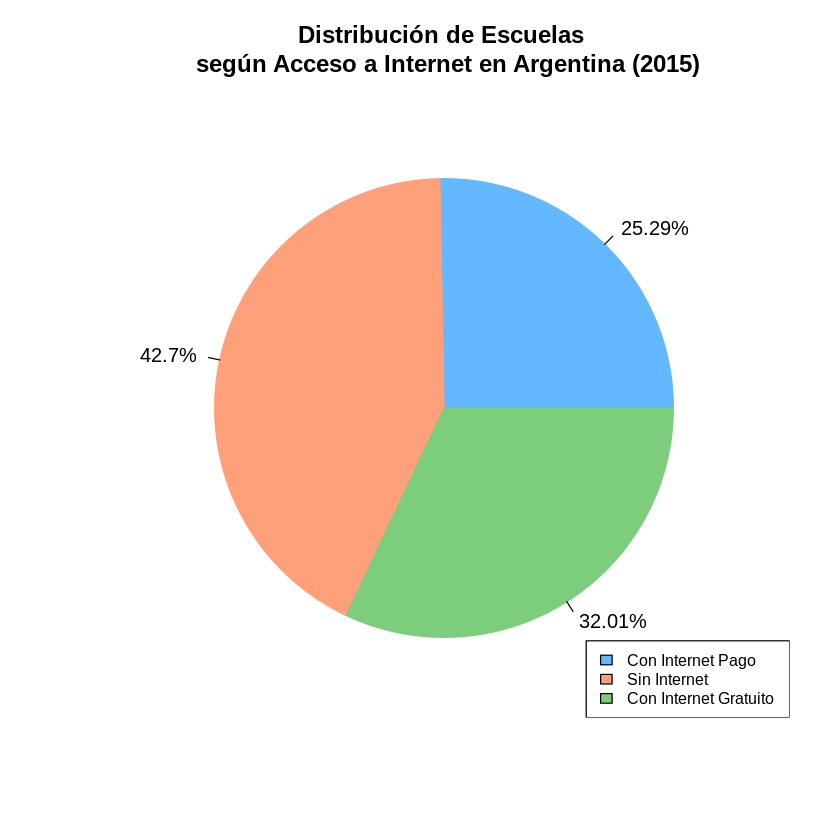

In [47]:
# Datos de escuelas
cantidad_escuelas_sin_internet_nacional <- características_internet_nacional$cantidad_escuelas_sin_internet
cantidad_escuelas_con_internet_gratuito_nacional <- características_internet_nacional$cantidad_escuelas_con_internet_gratuito
cantidad_escuelas_con_internet_pago_nacional <- características_internet_nacional$cantidad_escuelas_con_internet_pago
total_escuelas_nacional <- características_internet_nacional$cantidad_escuelas_total

# Cálculo de porcentajes con redondeo
porcentaje_sin_internet_nacional <- round((cantidad_escuelas_sin_internet_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_internet_gratuito_nacional <- round((cantidad_escuelas_con_internet_gratuito_nacional / total_escuelas_nacional) * 100, 2)
porcentaje_con_internet_pago_nacional <- round((cantidad_escuelas_con_internet_pago_nacional / total_escuelas_nacional) * 100, 2)

# Crear dataframe
conteo_internet_nacional <- data.frame(
  internet_categoria = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito"),
  cantidad = c(cantidad_escuelas_con_internet_pago_nacional,
              cantidad_escuelas_sin_internet_nacional,
               cantidad_escuelas_con_internet_gratuito_nacional),
  porcentaje = c(porcentaje_con_internet_pago_nacional,
                porcentaje_sin_internet_nacional,
                porcentaje_con_internet_gratuito_nacional)
)

# Colores para el gráfico
colors <- c("#63B8FF","#FFA07A", "#7CCD7C")  # Colores para el gráfico

# Crear el gráfico de torta para acceso a internet
pie(conteo_internet_nacional$porcentaje,
    labels = paste0(round(conteo_internet_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Acceso a Internet en Argentina (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_internet_nacional$internet_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_internet_nacional_2015.png", width = 500, height = 500)
pie(conteo_internet_nacional$porcentaje,
    labels = paste0(round(conteo_internet_nacional$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Acceso a Internet en Argentina (2015)",
    border = colors)
legend("bottomright", legend = conteo_internet_nacional$internet_categoria, fill = colors, cex = 0.8)
dev.off()


##### Extranjeros

pdf 
  2

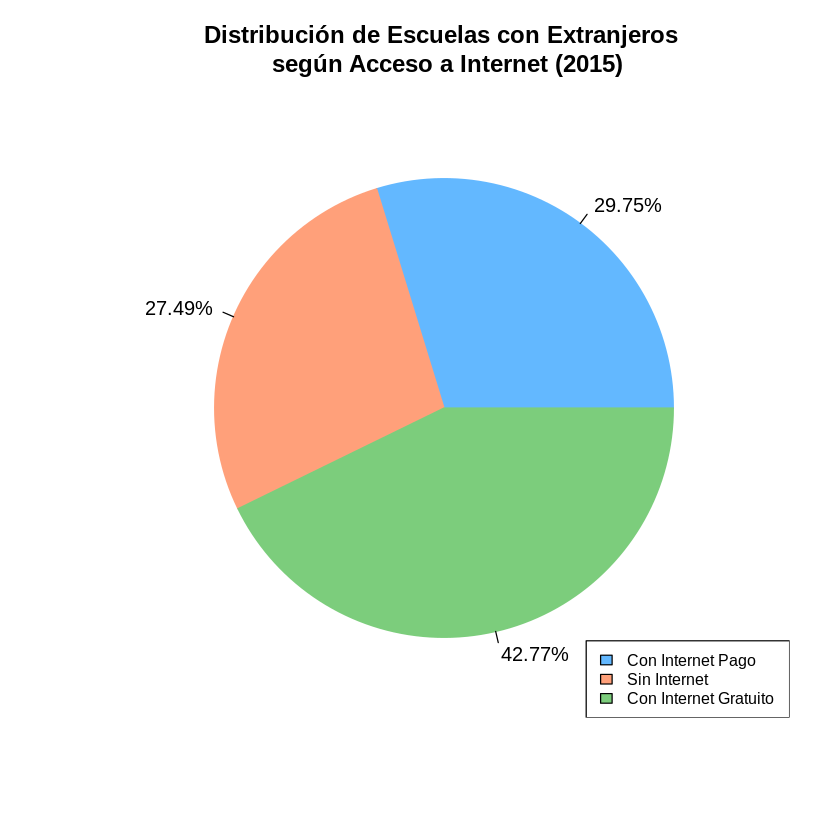

In [48]:
# Datos de las escuelas con extranjeros
cantidad_escuelas_sin_internet_extranjeros <- características_internet_nacional_extranjeros$cantidad_escuelas_sin_internet
cantidad_escuelas_con_internet_gratuito_extranjeros <- características_internet_nacional_extranjeros$cantidad_escuelas_con_internet_gratuito
cantidad_escuelas_con_internet_pago_extranjeros <- características_internet_nacional_extranjeros$cantidad_escuelas_con_internet_pago
total_escuelas_extranjeros <- características_internet_nacional_extranjeros$cantidad_escuelas_extranjeros

# Cálculo de porcentajes con redondeo
porcentaje_sin_internet <- round((cantidad_escuelas_sin_internet_extranjeros / total_escuelas_extranjeros) * 100, 2)
porcentaje_con_internet_gratuito <- round((cantidad_escuelas_con_internet_gratuito_extranjeros / total_escuelas_extranjeros) * 100, 2)
porcentaje_con_internet_pago <- round((cantidad_escuelas_con_internet_pago_extranjeros / total_escuelas_extranjeros) * 100, 2)

# Crear un dataframe para el gráfico y para guardar
conteo_internet_extranjeros <- data.frame(
  internet_categoria = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito"),
  cantidad = c(cantidad_escuelas_con_internet_pago_extranjeros,
              cantidad_escuelas_sin_internet_extranjeros,
               cantidad_escuelas_con_internet_gratuito_extranjeros),
  porcentaje = c(porcentaje_con_internet_pago,
                porcentaje_sin_internet,
                porcentaje_con_internet_gratuito)
)

# Colores para el gráfico
colors <- c("#63B8FF","#FFA07A", "#7CCD7C")  # Colores para el gráfico

# Crear el gráfico de torta para acceso a internet
pie(conteo_internet_extranjeros$porcentaje,
    labels = paste0(round(conteo_internet_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Internet (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_internet_extranjeros$internet_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_internet_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_internet_extranjeros$porcentaje,
    labels = paste0(round(conteo_internet_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Acceso a Internet (2015)",
    border = colors)
legend("bottomright", legend = conteo_internet_extranjeros$internet_categoria, fill = colors, cex = 0.8)
dev.off()


##### Sin extranjeros

pdf 
  2

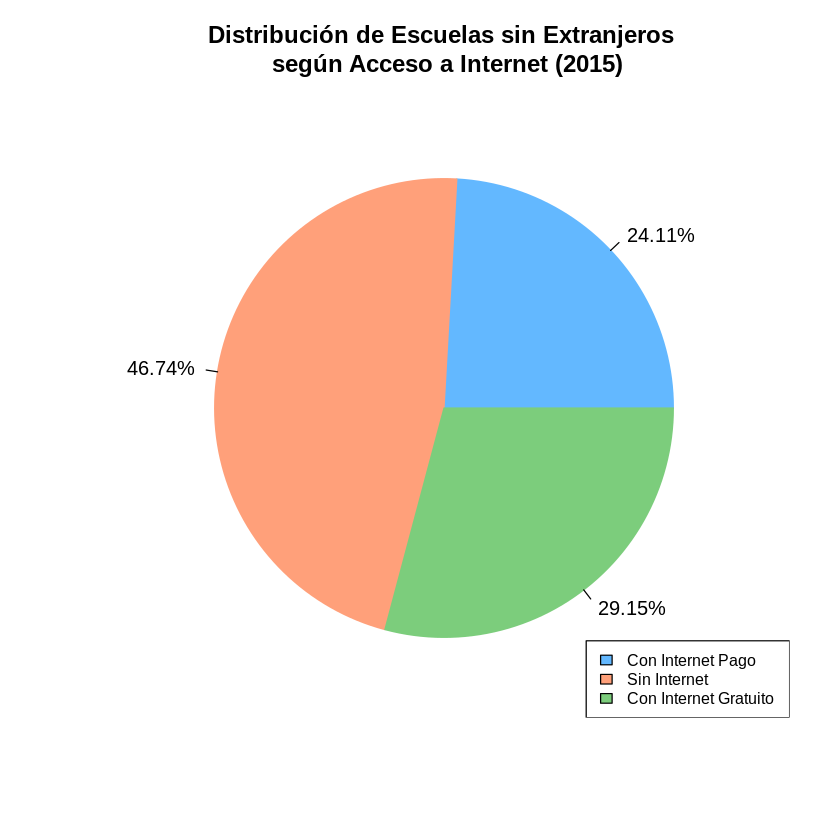

In [49]:
# Datos de las escuelas con sin extranjeros
cantidad_escuelas_sin_internet_sin_extranjeros <- características_internet_nacional_sin_extranjeros$cantidad_escuelas_sin_internet
cantidad_escuelas_con_internet_gratuito_sin_extranjeros <- características_internet_nacional_sin_extranjeros$cantidad_escuelas_con_internet_gratuito
cantidad_escuelas_con_internet_pago_sin_extranjeros <- características_internet_nacional_sin_extranjeros$cantidad_escuelas_con_internet_pago
total_escuelas_sin_extranjeros <- características_internet_nacional_sin_extranjeros$cantidad_escuelas_sin_extranjeros

# Cálculo de porcentajes con redondeo
porcentaje_sin_internet_sin_extranjeros <- round((cantidad_escuelas_sin_internet_sin_extranjeros / total_escuelas_sin_extranjeros) * 100, 2)
porcentaje_con_internet_gratuito_sin_extranjeros <- round((cantidad_escuelas_con_internet_gratuito_sin_extranjeros / total_escuelas_sin_extranjeros) * 100, 2)
porcentaje_con_internet_pago_sin_extranjeros <- round((cantidad_escuelas_con_internet_pago_sin_extranjeros / total_escuelas_sin_extranjeros) * 100, 2)

# Crear un dataframe para el gráfico y para guardar
conteo_internet_sin_extranjeros <- data.frame(
  internet_categoria = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito"),
  cantidad = c(cantidad_escuelas_con_internet_pago_sin_extranjeros,
              cantidad_escuelas_sin_internet_sin_extranjeros,
               cantidad_escuelas_con_internet_gratuito_sin_extranjeros),
  porcentaje = c(porcentaje_con_internet_pago_sin_extranjeros,
                porcentaje_sin_internet_sin_extranjeros,
                porcentaje_con_internet_gratuito_sin_extranjeros)
)

# Colores para el gráfico
colors <- c("#63B8FF","#FFA07A", "#7CCD7C")  # Colores para el gráfico

# Crear el gráfico de torta para acceso a internet
pie(conteo_internet_sin_extranjeros$porcentaje,
    labels = paste0(round(conteo_internet_sin_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Acceso a Internet (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomright", legend = conteo_internet_sin_extranjeros$internet_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_acceso_internet_sin_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_internet_sin_extranjeros$porcentaje,
    labels = paste0(round(conteo_internet_sin_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Acceso a Internet (2015)",
    border = colors)
legend("bottomright", legend = conteo_internet_sin_extranjeros$internet_categoria, fill = colors, cex = 0.8)
dev.off()


#### Provincial

##### Total

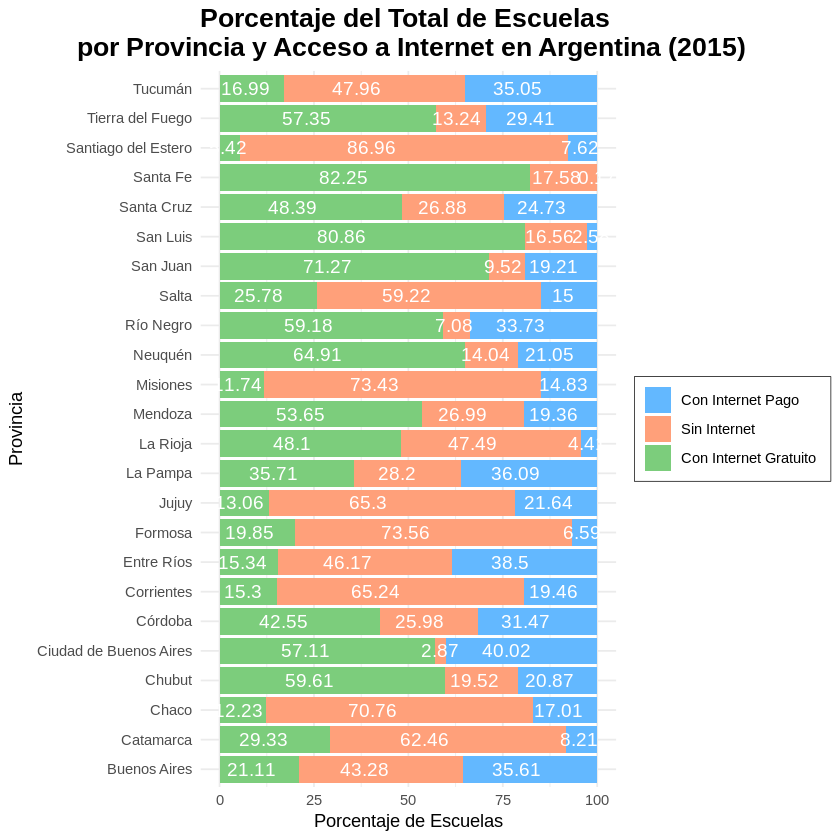

In [50]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_internet_por_provincia_total %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_internet",
               values_to = "porcentaje") %>%
  mutate(tipo_internet = factor(tipo_internet,
                                 levels = c("porcentaje_sin_internet", "porcentaje_con_internet_gratuito", "porcentaje_con_internet_pago"),
                                 labels = c("Sin Internet", "Con Internet Gratuito", "Con Internet Pago" )))  # Reordenar niveles

# Asegurarse de que "Con Internet Gratuito" aparezca primero
características_long$tipo_internet <- factor(características_long$tipo_internet,
                                             levels = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito" ))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_internet)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = round(porcentaje, 2)),
            position = position_stack(vjust = 0.4), size = 4, # Agregar los porcentajes encima de las barras
            color = "white") + # Color del texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas \n por Provincia y Acceso a Internet en Argentina (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#63B8FF","#FFA07A", "#7CCD7C")) +  # Colores ajustados al nuevo orden
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con fondo blanco
ggsave("porcentaje_de_escuelas_por_provincia_tipo_internet_total_2015.png", width = 8, height = 8, dpi = 300, bg = "white")


##### Extranjeros

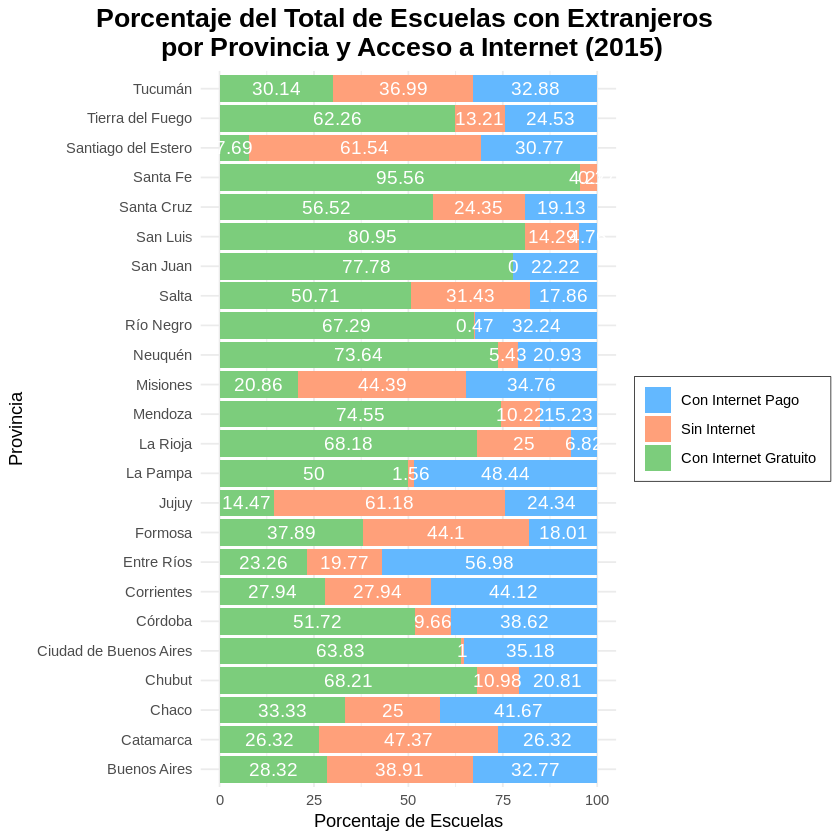

In [51]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_internet_por_provincia_extranjeros %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_internet",
               values_to = "porcentaje") %>%
  mutate(tipo_internet = factor(tipo_internet,
                                 levels = c("porcentaje_sin_internet", "porcentaje_con_internet_gratuito", "porcentaje_con_internet_pago"),
                                 labels = c("Sin Internet", "Con Internet Gratuito", "Con Internet Pago" )))  # Reordenar niveles

# Asegurarse de que "Con Internet Gratuito" aparezca primero
características_long$tipo_internet <- factor(características_long$tipo_internet,
                                             levels = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito" ))


# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_internet)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = porcentaje),
            position = position_stack(vjust = 0.5), size = 4, # Agregar los porcentajes encima de las barras
            color = "white") + # Color del texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas con Extranjeros \n por Provincia y Acceso a Internet (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#63B8FF","#FFA07A", "#7CCD7C")) +  # Colores ajustados al nuevo orden
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con fondo blanco
ggsave("porcentaje_de_escuelas_por_provincia_tipo_internet_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")



##### Sin extranjeros

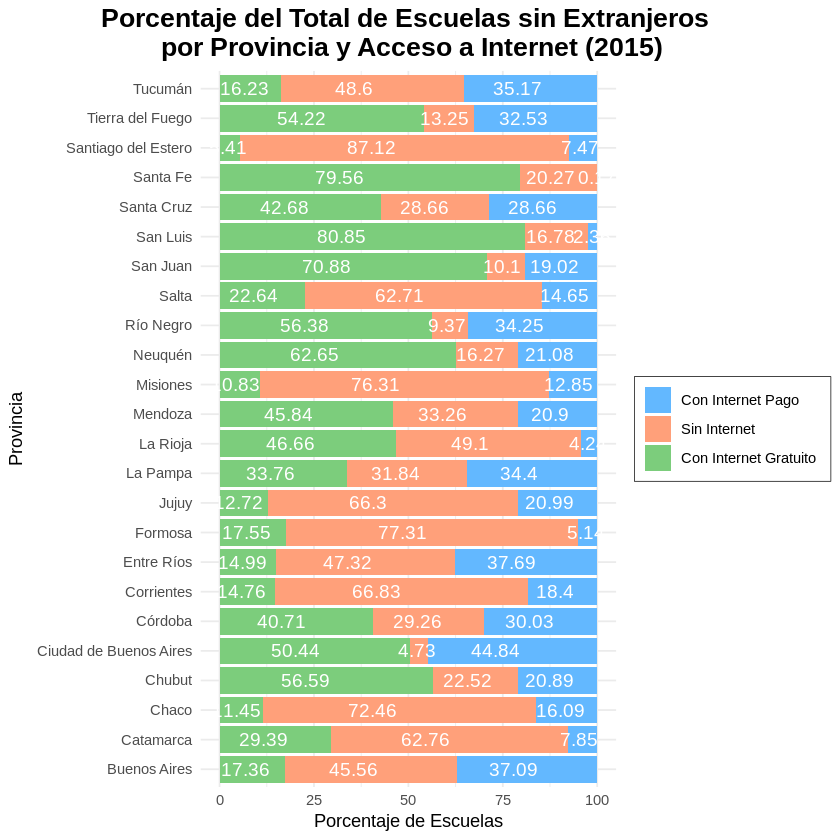

In [52]:
# Reestructurar el dataframe para facilitar la creación del gráfico
características_long <- características_internet_por_provincia_sin_extranjeros %>%
  select(provincia, starts_with("porcentaje_")) %>%  # Seleccionar solo las columnas que empiezan con 'porcentaje_'
  pivot_longer(cols = starts_with("porcentaje_"),
               names_to = "tipo_internet",
               values_to = "porcentaje") %>%
  mutate(tipo_internet = factor(tipo_internet,
                                 levels = c("porcentaje_sin_internet", "porcentaje_con_internet_gratuito", "porcentaje_con_internet_pago"),
                                 labels = c("Sin Internet", "Con Internet Gratuito", "Con Internet Pago" )))  # Reordenar niveles

# Asegurarse de que "Con Internet Gratuito" aparezca primero
características_long$tipo_internet <- factor(características_long$tipo_internet,
                                             levels = c("Con Internet Pago", "Sin Internet", "Con Internet Gratuito" ))


# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(características_long, aes(x = provincia, y = porcentaje, fill = tipo_internet)) +
  geom_bar(stat = 'identity', position = 'stack') +  # Apilar las barras
  geom_text(aes(label = round(porcentaje, 2)),
            position = position_stack(vjust = 0.4), size = 4, # Agregar los porcentajes encima de las barras
            color = "white") + # Color del texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas sin Extranjeros \n por Provincia y Acceso a Internet (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),
        legend.background = element_rect(size = 0.2)) +
  scale_fill_manual(values = c("#63B8FF","#FFA07A", "#7CCD7C")) +  # Colores ajustados al nuevo orden
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con fondo blanco
ggsave("porcentaje_de_escuelas_por_provincia_tipo_internet_sin_extranjeros_2015.png", width = 8, height = 8, dpi = 300, bg = "white")

### Excel

In [ ]:
# Guardar los resultados en archivos Excel
write_xlsx(list("Total" = conteo_internet_nacional,
                "Con Extranjeros" = conteo_internet_extranjeros,
                "Sin Extranjeros" = conteo_internet_sin_extranjeros,
                "Por Provincia" = características_internet_por_provincia_total,
                "Por Provincia con Extranjeros" = características_internet_por_provincia_extranjeros,
                "Por Provincia sin Extranjeros" = características_internet_por_provincia_sin_extranjeros),
           "internet_2023.xlsx")

# Biblioteca

### Cálculos

#### Nacional

In [28]:
# Definir las columnas que contienen información sobre biblioteca
columnas_biblioteca <- c(
  'id',
  'provincia',
  'Biblioteca...Dispone.de.al.menos.una....Si')

# ================================================================
# TOTAL
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_nacional <- características %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE)
  ) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total = nrow(características)
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total) * 100,2)
  )

# ================================================================
# EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_nacional_extranjeros <- características_con_extranjeros %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE),
  ) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total_con_extranjeros = nrow(características_con_extranjeros)
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total_con_extranjeros) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total_con_extranjeros) * 100,2)
  )

# ================================================================
# SIN EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_nacional_sin_extranjeros <- características_sin_extranjeros %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE),
  ) %>%
  # Calcular las cantidades
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total_sin_extranjeros = nrow(características_sin_extranjeros)
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total_sin_extranjeros) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total_sin_extranjeros) * 100,2)
  )

# ================================================================
# MOTRAR RESULTADOS
# ================================================================

# Mostrar los resultados
head(características_infraestructura_nacional_extranjeros)
head(características_infraestructura_nacional_sin_extranjeros)
head(características_infraestructura_nacional)

,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total_con_extranjeros,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
,<int>,<int>,<int>,<dbl>,<dbl>
1,8247,1882,10129,81.42,18.58


,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total_sin_extranjeros,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
,<int>,<int>,<int>,<dbl>,<dbl>
1,25016,13138,38154,65.57,34.43


,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
,<int>,<int>,<int>,<dbl>,<dbl>
1,33263,15020,48283,68.89,31.11


#### Provincial

In [35]:
# Definir las columnas que contienen información sobre biblioteca
columnas_biblioteca <- c(
  'id',
  'provincia',
  'Biblioteca...Dispone.de.al.menos.una....Si')

# ================================================================
# PROVINCIA: TOTAL
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_provincial <- características %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE),
  ) %>%
  # Agrupar por provincia
  group_by(provincia) %>%
  # Calcular las cantidades y porcentajes
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total = n(),  # Cambiar el nombre para reflejar el contexto
    .groups = 'drop'  # Para eliminar la agrupación después de la summarise
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total) * 100,2)
    )

# ================================================================
# PROVINCIA: EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_provincial_extranjeros <- características_con_extranjeros %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE),
  ) %>%
  # Agrupar por provincia
  group_by(provincia) %>%
  # Calcular las cantidades y porcentajes
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total_con_extranjeros = n(),
    .groups = 'drop'  # Para eliminar la agrupación después de la summarise
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total_con_extranjeros) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total_con_extranjeros) * 100,2)
  )

# ================================================================
# PROVINCIA: SIN EXTRANJEROS
# ================================================================

# Crear un nuevo dataframe solo con las columnas relevantes
características_infraestructura_provincial_sin_extranjeros <- características_sin_extranjeros %>%
  select(all_of(columnas_biblioteca)) %>%
  # Calcular los totales usando rowSums para contar las escuelas con biblioteca
  mutate(
    total_biblioteca = rowSums(select(., 'Biblioteca...Dispone.de.al.menos.una....Si') == "X", na.rm = TRUE),
  ) %>%
  # Agrupar por provincia
  group_by(provincia) %>%
  # Calcular las cantidades y porcentajes
  summarise(
    cantidad_escuelas_con_biblioteca = sum(total_biblioteca > 0, na.rm = TRUE),
    cantidad_escuelas_sin_biblioteca = sum(total_biblioteca == 0, na.rm = TRUE),
    total_sin_extranjeros = n(),
    .groups = 'drop'  # Para eliminar la agrupación después de la summarise
  ) %>%
  # Calcular los porcentajes
  mutate(
    porcentaje_escuelas_con_biblioteca = round((cantidad_escuelas_con_biblioteca / total_sin_extranjeros) * 100,2),
    porcentaje_escuelas_sin_biblioteca = round((cantidad_escuelas_sin_biblioteca / total_sin_extranjeros) * 100,2)
  )

# ================================================================
# MOTRAR RESULTADOS
# ================================================================

# Mostrar los resultados
head(características_infraestructura_provincial_extranjeros)
head(características_infraestructura_provincial_sin_extranjeros)
head(características_infraestructura_provincial)

provincia,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total_con_extranjeros,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Buenos Aires,4429,1115,5544,79.89,20.11
Catamarca,16,3,19,84.21,15.79
Chaco,54,18,72,75.00,25.00
Chubut,168,5,173,97.11,2.89
Ciudad de Buenos Aires,871,33,904,96.35,3.65
Corrientes,66,2,68,97.06,2.94


provincia,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total_sin_extranjeros,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Buenos Aires,6894,3770,10664,64.65,35.35
Catamarca,776,180,956,81.17,18.83
Chaco,642,1297,1939,33.11,66.89
Chubut,362,131,493,73.43,26.57
Ciudad de Buenos Aires,677,233,910,74.40,25.60
Corrientes,1271,321,1592,79.84,20.16


provincia,cantidad_escuelas_con_biblioteca,cantidad_escuelas_sin_biblioteca,total,porcentaje_escuelas_con_biblioteca,porcentaje_escuelas_sin_biblioteca
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Buenos Aires,11323,4885,16208,69.86,30.14
Catamarca,792,183,975,81.23,18.77
Chaco,696,1315,2011,34.61,65.39
Chubut,530,136,666,79.58,20.42
Ciudad de Buenos Aires,1548,266,1814,85.34,14.66
Corrientes,1337,323,1660,80.54,19.46


### Gráficos biblioteca

#### Nacional

##### Total

pdf 
  2

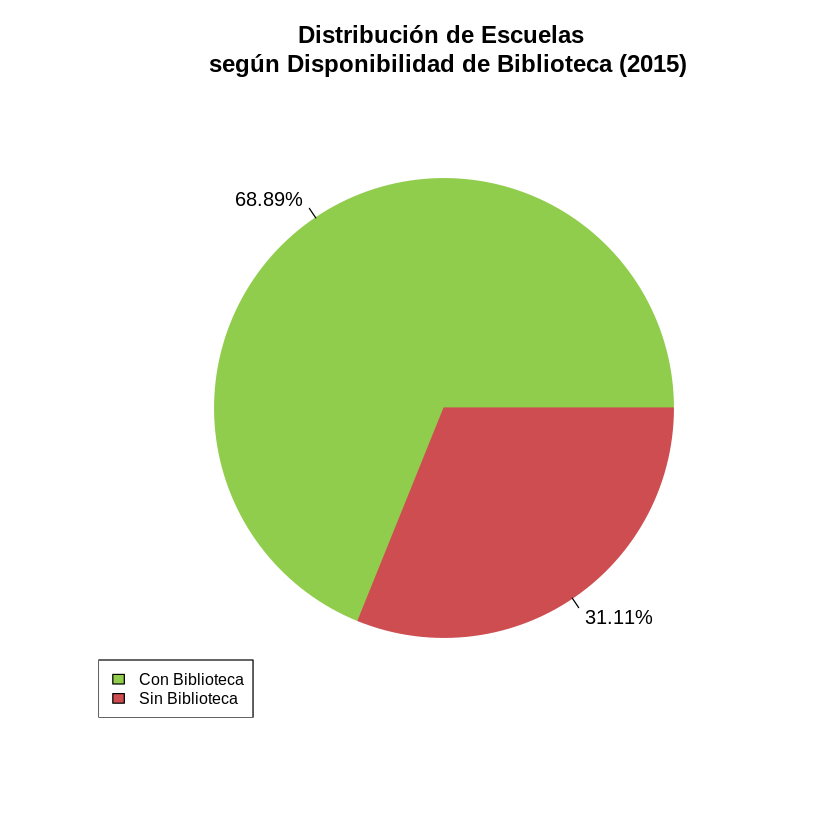

In [30]:
# Extraer cantidades de características de infraestructura sin extranjeros
cantidad_escuelas_con_biblioteca <- características_infraestructura_nacional$cantidad_escuelas_con_biblioteca
cantidad_escuelas_sin_biblioteca <- características_infraestructura_nacional$cantidad_escuelas_sin_biblioteca

# Cálculo de porcentajes
porcentaje_con_biblioteca <- características_infraestructura_nacional$porcentaje_escuelas_con_biblioteca
porcentaje_sin_biblioteca <- características_infraestructura_nacional$porcentaje_escuelas_sin_biblioteca

# Crear un dataframe para el gráfico de acceso a biblioteca
conteo_biblioteca <- data.frame(
  biblioteca_categoria = c("Con Biblioteca", "Sin Biblioteca"),
  cantidad = c(cantidad_escuelas_con_biblioteca,
               cantidad_escuelas_sin_biblioteca),
  porcentaje = c(porcentaje_con_biblioteca,
                 porcentaje_sin_biblioteca)
)

# Colores para el gráfico
colors <- c('#91cd4d', '#cd4d51')  # Colores para el gráfico

# Crear el gráfico de torta para acceso a biblioteca
pie(conteo_biblioteca$porcentaje,
    labels = paste0(round(conteo_biblioteca$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Disponibilidad de Biblioteca (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomleft", legend = conteo_biblioteca$biblioteca_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_disponibilidad_biblioteca_2015.png", width = 500, height = 500)
pie(conteo_biblioteca$porcentaje,
    labels = paste0(round(conteo_biblioteca$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas \n según Disponibilidad de Biblioteca (2015)",
    border = colors)
legend("bottomleft", legend = conteo_biblioteca$biblioteca_categoria, fill = colors, cex = 0.8)
dev.off()

##### Extranjeros

pdf 
  2

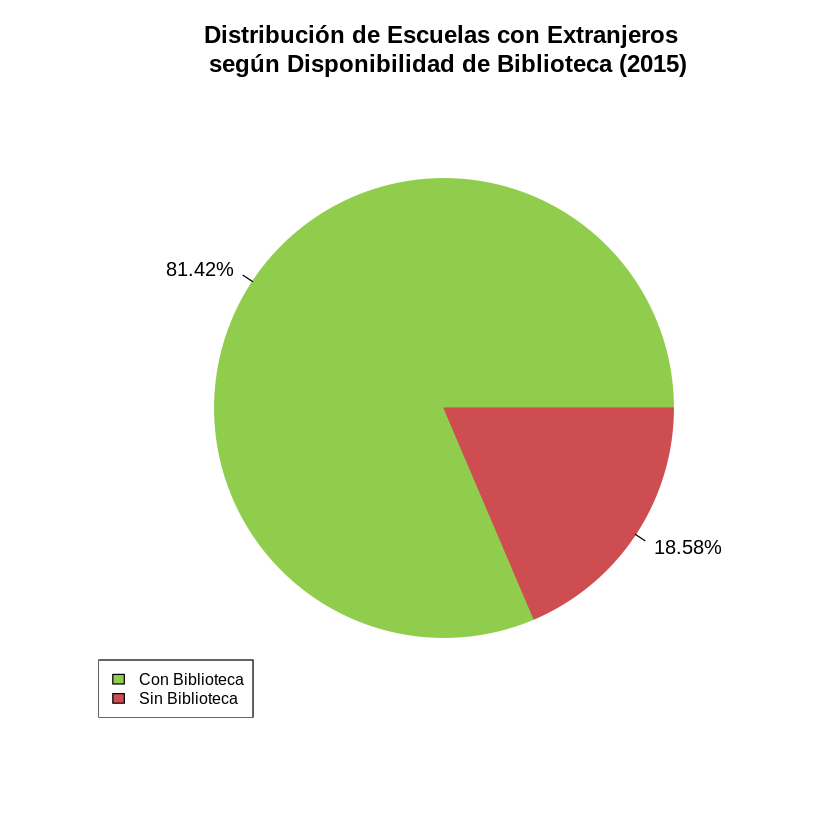

In [31]:
# Extraer cantidades de características de infraestructura con extranjeros
cantidad_escuelas_con_biblioteca_extranjeros <- características_infraestructura_nacional_extranjeros$cantidad_escuelas_con_biblioteca
cantidad_escuelas_sin_biblioteca_extranjeros <- características_infraestructura_nacional_extranjeros$cantidad_escuelas_sin_biblioteca

# Cálculo de porcentajes
porcentaje_con_biblioteca <- características_infraestructura_nacional_extranjeros$porcentaje_escuelas_con_biblioteca
porcentaje_sin_biblioteca <- características_infraestructura_nacional_extranjeros$porcentaje_escuelas_sin_biblioteca

# Crear un dataframe para el gráfico de acceso a biblioteca
conteo_biblioteca_extranjeros <- data.frame(
  biblioteca_categoria = c("Con Biblioteca", "Sin Biblioteca"),
  cantidad = c(cantidad_escuelas_con_biblioteca_extranjeros,
               cantidad_escuelas_sin_biblioteca_extranjeros),
  porcentaje = c(porcentaje_con_biblioteca,
                 porcentaje_sin_biblioteca)
)

# Colores para el gráfico
colors <- c('#91cd4d', '#cd4d51')  # Colores para el gráfico

# Crear el gráfico de torta para acceso a biblioteca
pie(conteo_biblioteca_extranjeros$porcentaje,
    labels = paste0(round(conteo_biblioteca_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Disponibilidad de Biblioteca (2015)",
    border = colors)

# Agregar la leyenda
legend("bottomleft", legend = conteo_biblioteca_extranjeros$biblioteca_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_disponibilidad_biblioteca_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_biblioteca_extranjeros$porcentaje,
    labels = paste0(round(conteo_biblioteca_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas con Extranjeros \n según Disponibilidad de Biblioteca (2015)",
    border = colors)
legend("bottomleft", legend = conteo_biblioteca_extranjeros$biblioteca_categoria, fill = colors, cex = 0.8)
dev.off()

##### Sin extranjeros

pdf 
  2

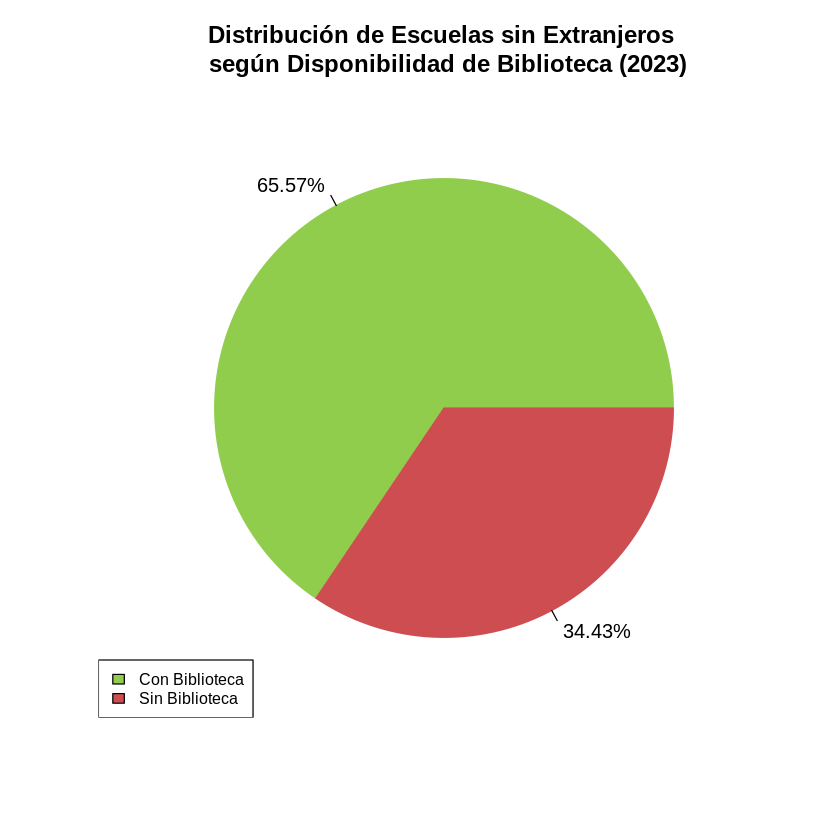

In [32]:
# Extraer cantidades de características de infraestructura sin extranjeros
cantidad_escuelas_con_biblioteca_sin_extranjeros <- características_infraestructura_nacional_sin_extranjeros$cantidad_escuelas_con_biblioteca
cantidad_escuelas_sin_biblioteca_sin_extranjeros <- características_infraestructura_nacional_sin_extranjeros$cantidad_escuelas_sin_biblioteca

# Cálculo de porcentajes
porcentaje_con_biblioteca <- características_infraestructura_nacional_sin_extranjeros$porcentaje_escuelas_con_biblioteca
porcentaje_sin_biblioteca <- características_infraestructura_nacional_sin_extranjeros$porcentaje_escuelas_sin_biblioteca

# Crear un dataframe para el gráfico de acceso a biblioteca
conteo_biblioteca_sin_extranjeros <- data.frame(
  biblioteca_categoria = c("Con Biblioteca", "Sin Biblioteca"),
  cantidad = c(cantidad_escuelas_con_biblioteca_sin_extranjeros,
               cantidad_escuelas_sin_biblioteca_sin_extranjeros),
  porcentaje = c(porcentaje_con_biblioteca,
                 porcentaje_sin_biblioteca)
)

# Colores para el gráfico
colors <- c('#91cd4d', '#cd4d51')  # Colores para el gráfico

# Crear el gráfico de torta para acceso a biblioteca
pie(conteo_biblioteca_sin_extranjeros$porcentaje,
    labels = paste0(round(conteo_biblioteca_sin_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Disponibilidad de Biblioteca (2023)",
    border = colors)

# Agregar la leyenda
legend("bottomleft", legend = conteo_biblioteca_sin_extranjeros$biblioteca_categoria, fill = colors, cex = 0.8)

# Guardar el gráfico como imagen
png("grafico_torta_disponibilidad_biblioteca_sin_extranjeros_2015.png", width = 500, height = 500)
pie(conteo_biblioteca_sin_extranjeros$porcentaje,
    labels = paste0(round(conteo_biblioteca_sin_extranjeros$porcentaje, 2), "%"),
    col = colors,
    main = "Distribución de Escuelas sin Extranjeros \n según Disponibilidad de Biblioteca (2015)",
    border = colors)
legend("bottomleft", legend = conteo_biblioteca_sin_extranjeros$biblioteca_categoria, fill = colors, cex = 0.8)
dev.off()


#### Provincial

##### Total

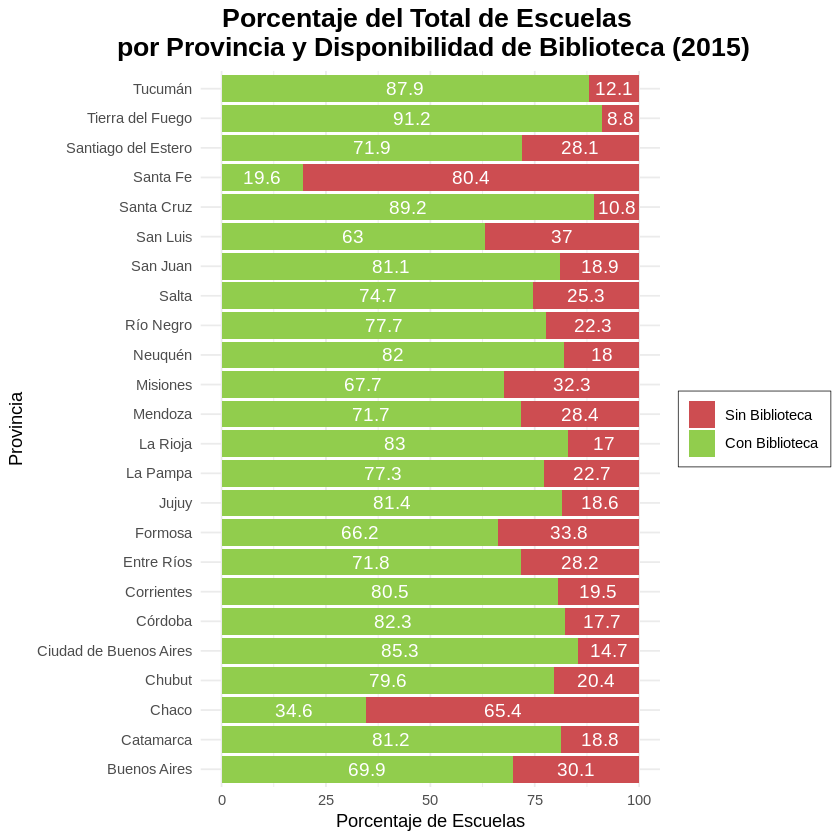

In [36]:
# Crear dataframe
df_biblioteca <- data.frame(
  provincia = características_infraestructura_provincial$provincia,
  sector = c(rep("Con Biblioteca", nrow(características_infraestructura_provincial)),
             rep("Sin Biblioteca", nrow(características_infraestructura_provincial))),
  cantidad_escuelas = c(características_infraestructura_provincial$cantidad_escuelas_con_biblioteca,
                        características_infraestructura_provincial$cantidad_escuelas_sin_biblioteca),
  porcentaje = c(características_infraestructura_provincial$porcentaje_escuelas_con_biblioteca,
                 características_infraestructura_provincial$porcentaje_escuelas_sin_biblioteca)
)

# Reordenar el factor 'sector' para que "Con Biblioteca" aparezca primero
df_biblioteca$sector <- factor(df_biblioteca$sector, levels = c("Sin Biblioteca", "Con Biblioteca"))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df_biblioteca, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 1)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.5),  # Centrar el texto en el medio de cada segmento
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas \n por Provincia y Disponibilidad de Biblioteca (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Disponibilidad de Biblioteca', values = c( '#cd4d51','#91cd4d')) +
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_disponibilidad_biblioteca_2015.png", width = 8, height = 8, dpi = 300)

##### Extranjeros

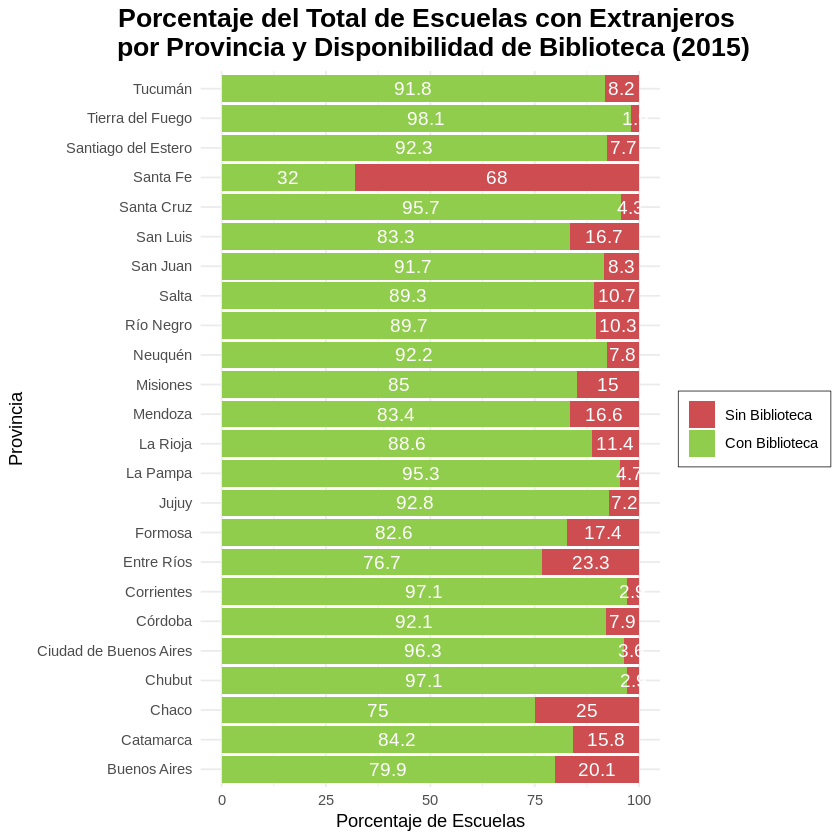

In [37]:
# Crear dataframe
df_biblioteca <- data.frame(
  provincia = características_infraestructura_provincial_extranjeros$provincia,
  sector = c(rep("Con Biblioteca", nrow(características_infraestructura_provincial_extranjeros)),
             rep("Sin Biblioteca", nrow(características_infraestructura_provincial_extranjeros))),
  cantidad_escuelas = c(características_infraestructura_provincial_extranjeros$cantidad_escuelas_con_biblioteca,
                        características_infraestructura_provincial_extranjeros$cantidad_escuelas_sin_biblioteca),
  porcentaje = c(características_infraestructura_provincial_extranjeros$porcentaje_escuelas_con_biblioteca,
                 características_infraestructura_provincial_extranjeros$porcentaje_escuelas_sin_biblioteca)
)

# Reordenar el factor 'sector' para que "Con Biblioteca" aparezca primero
df_biblioteca$sector <- factor(df_biblioteca$sector, levels = c("Sin Biblioteca", "Con Biblioteca"))

# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df_biblioteca, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 1)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.5),  # Centrar el texto en el medio de cada segmento
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas con Extranjeros \n por Provincia y Disponibilidad de Biblioteca (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Disponibilidad de Biblioteca', values = c( '#cd4d51','#91cd4d')) +
  coord_flip()  # Voltear el gráfico para que sea horizontal

# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_disponibilidad_biblioteca_extranjeros_2015.png", width = 8, height = 8, dpi = 300)


##### Sin extranjeros

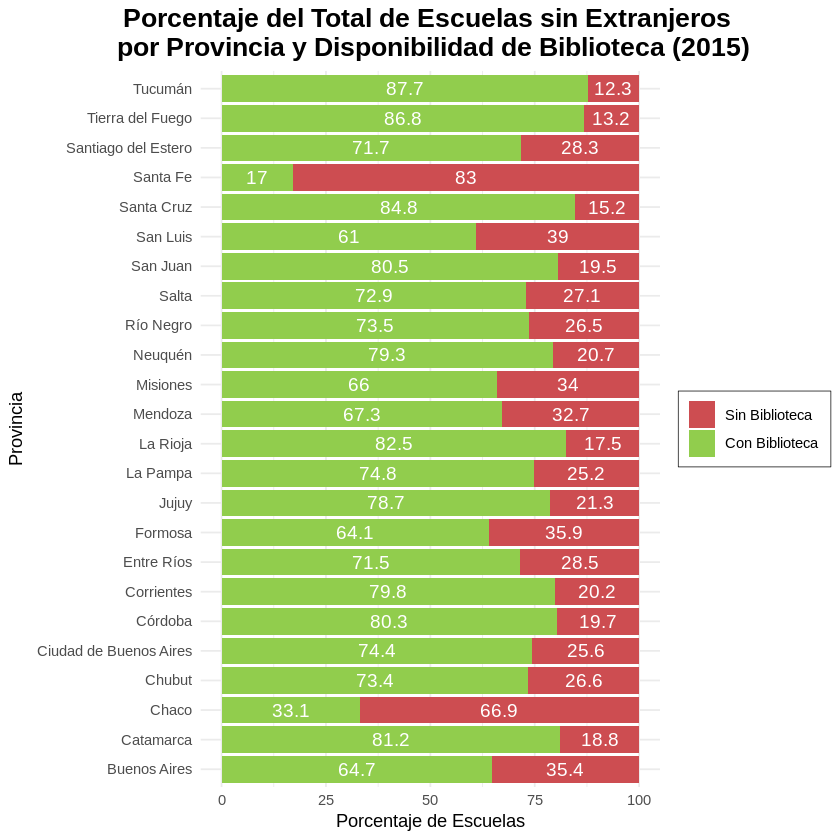

In [38]:
# Crear dataframe
df_biblioteca <- data.frame(
  provincia = características_infraestructura_provincial_sin_extranjeros$provincia,
  sector = c(rep("Con Biblioteca", nrow(características_infraestructura_provincial_sin_extranjeros)),
             rep("Sin Biblioteca", nrow(características_infraestructura_provincial_sin_extranjeros))),
  cantidad_escuelas = c(características_infraestructura_provincial_sin_extranjeros$cantidad_escuelas_con_biblioteca,
                        características_infraestructura_provincial_sin_extranjeros$cantidad_escuelas_sin_biblioteca),
  porcentaje = c(características_infraestructura_provincial_sin_extranjeros$porcentaje_escuelas_con_biblioteca,
                 características_infraestructura_provincial_sin_extranjeros$porcentaje_escuelas_sin_biblioteca)
)

# Reordenar el factor 'sector' para que "Con Biblioteca" aparezca primero
df_biblioteca$sector <- factor(df_biblioteca$sector, levels = c("Sin Biblioteca", "Con Biblioteca"))


# Crear el gráfico de barras apiladas en orientación horizontal
ggplot(df_biblioteca, aes(fill = sector, x = provincia, y = porcentaje)) +
  geom_bar(position = 'stack', stat = 'identity') +  # Mantener 'stack' para apilar
  geom_text(aes(label = round(porcentaje, 1)),  # Redondear el porcentaje a 1 decimal
            position = position_stack(vjust = 0.5),  # Centrar el texto en el medio de cada segmento
            color = "white",  # Color del texto
            size = 4) +  # Ajustar tamaño de texto
  theme_minimal() +
  labs(x = 'Provincia', y = 'Porcentaje de Escuelas',
       title = 'Porcentaje del Total de Escuelas sin Extranjeros \n por Provincia y Disponibilidad de Biblioteca (2015)') +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = 'bold'),
        legend.title = element_blank(),  # Eliminar el título de la leyenda
        legend.background = element_rect(size = 0.2)) +  # Fondo gris para la leyenda
  scale_fill_manual('Disponibilidad de Biblioteca', values = c( '#cd4d51','#91cd4d'))   +
  coord_flip()  # Voltear el gráfico para que sea horizontal


# Guardar el gráfico con ggsave
ggsave("porcentaje_de_escuelas_por_provincia_disponibilidad_biblioteca_sin_extranjeros_2015.png", width = 8, height = 8, dpi = 300)


### Excel

In [ ]:
# Guardar los resultados en un archivo Excel con varias hojas
write_xlsx(list("Total" = conteo_biblioteca,
                "Con Extranjeros" = conteo_biblioteca_extranjeros,
                "Sin Extranjeros" = conteo_biblioteca_sin_extranjeros,
                "Por Provincia" = características_infraestructura_provincial,
                "Por Provincia con Extranjeros" = características_infraestructura_provincial_extranjeros,
                "Por Provincia sin Extranjeros" = características_infraestructura_provincial_sin_extranjeros),
           "biblioteca_2023.xlsx")